<IPython.core.display.Javascript object>


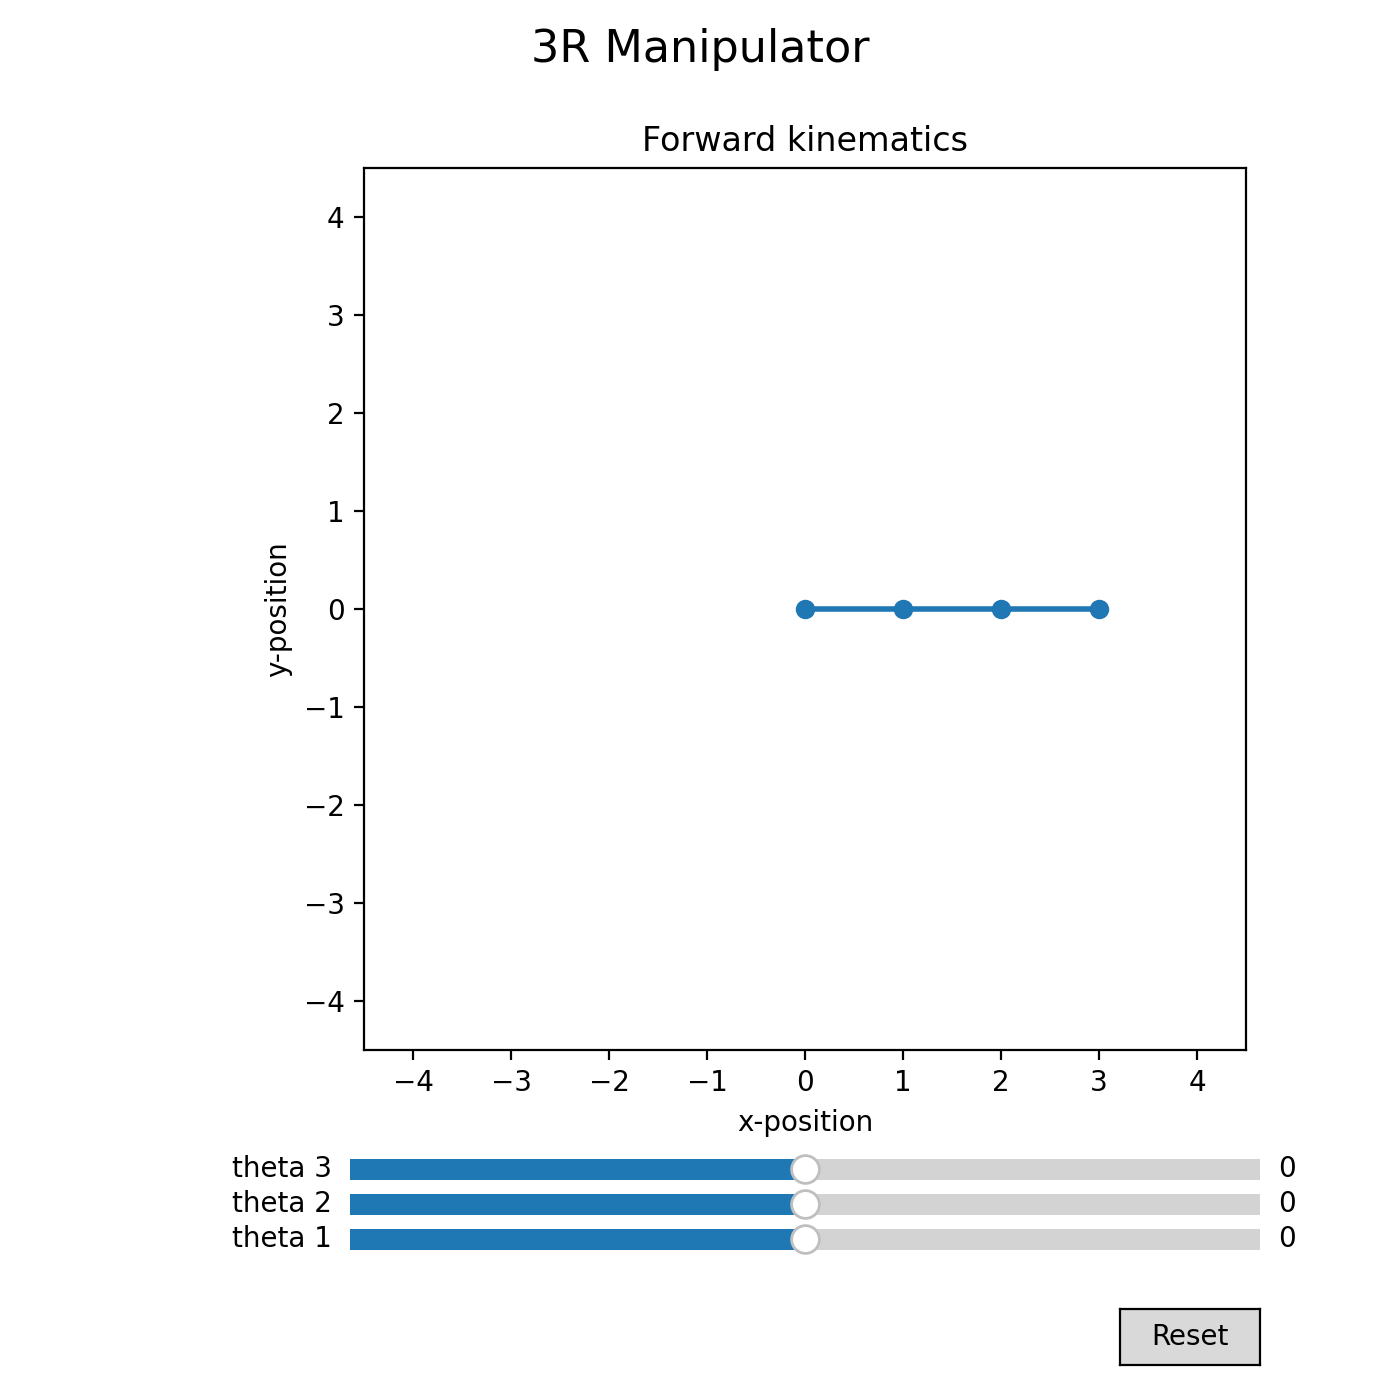

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
%matplotlib notebook

# th1 and th2 are the initial angles (degrees)
# w10 and w20 are the initial angular velocities (degrees per second)
init_th1 = 0.0
init_th2 = 0.0
init_th3 = 0.0

c = np.cos
s = np.sin

l1 = 1
l2 = 1 
l3 = 1


class Manipulator:
    def __init__(self, l1, l2, l3):
        self.l1 = l1
        self.l2 = l2
        self.l3 = l3
        
    def forward3R(self, th1, th2, th3):
        th1 = np.radians(th1)
        th2 = np.radians(th2)
        th3 = np.radians(th3)
        P1 = np.array([self.l1*c(th1), self.l1*s(th1)])
        P2 = np.array([self.l1*c(th1)+self.l2*c(th1+th2),self.l1*s(th1)+self.l2*s(th1+th2)])
        P3 = np.array([self.l1*c(th1)+self.l2*c(th1+th2)+self.l3*c(th1+th2+th3),self.l1*s(th1)+self.l2*s(th1+th2)+self.l3*s(th1+th2+th3)])
        return P1, P2, P3


L = l1+l2+l3
man = Manipulator(l1,l2,l3)    
fig = plt.figure(figsize=(7, 7))
fig.suptitle('3R Manipulator', fontsize=16)
ax = fig.add_subplot(autoscale_on=False, xlim=(-1.5*L, 1.5*L), ylim=(-1.5*L, 1.5*L))
plt.title("Forward kinematics")
P1,P2,P3 = man.forward3R(init_th1,init_th2,init_th3)
line, = ax.plot([0,P1[0],P2[0],P3[0]], [0,P1[1],P2[1],P3[1]], 'o-', lw=2)
ax.set_xlabel('x-position')
ax.set_ylabel('y-position')
ax.set_aspect('equal')
fig.subplots_adjust(left=0.25, bottom=0.25)




axth1 = fig.add_axes([0.25, 0.1, 0.65, 0.03])
th1_slider = Slider(
    ax=axth1,
    label='theta 1',
    valmin=-360,
    valmax=360,
    valinit= init_th1,
)

axth2 = fig.add_axes([0.25, 0.125, 0.65, 0.03])
th2_slider = Slider(
    ax=axth2,
    label='theta 2',
    valmin=-360,
    valmax=360,
    valinit= init_th2,
)

axth3 = fig.add_axes([0.25, 0.15, 0.65, 0.03])
th3_slider = Slider(
    ax=axth3,
    label='theta 3',
    valmin=-360,
    valmax=360,
    valinit= init_th3,
)

# The function to be called anytime a slider's value changes
def update(val):
    P1,P2,P3 = man.forward3R(th1_slider.val, th2_slider.val, th3_slider.val)
    line.set_xdata([0,P1[0],P2[0],P3[0]])
    line.set_ydata([0,P1[1],P2[1],P3[1]])
    print(P1)
    fig.canvas.draw_idle()
    
th1_slider.on_changed(update)
th2_slider.on_changed(update)
th3_slider.on_changed(update)

# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.975')

def reset(event):
    th1_slider.reset()
    th2_slider.reset()
    th3_slider.reset()
button.on_clicked(reset)
    
    
plt.show()